قسمت 7 3.20 دقیقه

In [286]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [287]:
data = np.array(pd.read_csv('./weather.csv')['MaxTemp']).reshape(-1)
data

array([24.3, 26.9, 23.4, 15.5, 16.1, 16.9, 18.2, 17. , 19.5, 22.8, 25.2,
       27.3, 27.9, 30.9, 31.2, 32.1, 31.2, 30. , 32.3, 33.4, 33.4, 19.4,
       18.5, 24.3, 28.4, 26.9, 22.2, 28. , 24.3, 24.1, 20.4, 26.3, 24.2,
       26.5, 21.8, 26.8, 25.8, 28.2, 29.4, 24.8, 18.5, 21.5, 20.3, 27.1,
       29.9, 21.1, 21.7, 20.9, 21. , 23.1, 29.5, 22. , 20.4, 24.4, 21.7,
       26.3, 26.7, 28.3, 31.6, 35. , 33.5, 34.2, 35. , 23.4, 25.3, 27.5,
       34.1, 33.9, 30.3, 29.9, 34.2, 35.8, 35.7, 33.8, 22.8, 33.8, 33.2,
       25.1, 20.4, 19.6, 24.7, 19.9, 22.5, 24.4, 27.8, 25.7, 28.8, 31.3,
       33.2, 33.9, 34.9, 27.8, 23.8, 28.8, 29.6, 22.6, 22.8, 27.4, 24.2,
       19.9, 20.9, 23.1, 26. , 24.2, 18.2, 24.2, 25.2, 26.1, 24.1, 25.8,
       27.1, 28.9, 24.8, 28.6, 25.1, 23.8, 25.9, 28.2, 27.6, 17.3, 18.4,
       21.8, 24.4, 27.3, 28.2, 27.6, 31.8, 29.2, 27.4, 27.8, 31.7, 34.7,
       31.7, 33.1, 33.8, 35.2, 32.3, 30.2, 29.9, 26.2, 29.3, 14.8, 19.6,
       24.9, 22.4, 17.4, 20.2, 18.3, 18.2, 18.5, 18

In [288]:
i = 0
df = []
for item in data:
    df.append([data[i + 0 : i + 7]])
    i += 1
df = df[:-6]
df = np.array(df).reshape(360, 7)
df



array([[24.3, 26.9, 23.4, ..., 16.1, 16.9, 18.2],
       [26.9, 23.4, 15.5, ..., 16.9, 18.2, 17. ],
       [23.4, 15.5, 16.1, ..., 18.2, 17. , 19.5],
       ...,
       [18. , 20.7, 25.5, ..., 30.7, 28.4, 19.9],
       [20.7, 25.5, 26.1, ..., 28.4, 19.9, 26.9],
       [25.5, 26.1, 30.7, ..., 19.9, 26.9, 30.2]], shape=(360, 7))

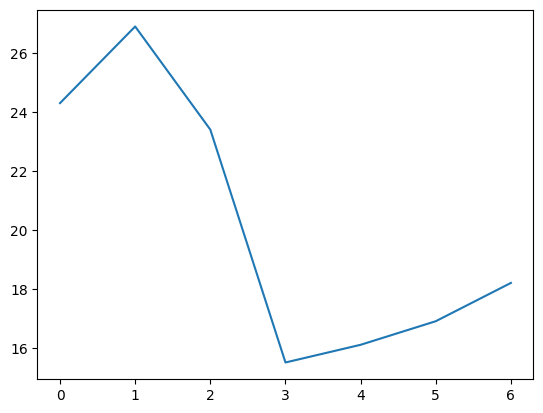

In [289]:
plt.plot(df[0])

<BarContainer object of 7 artists>

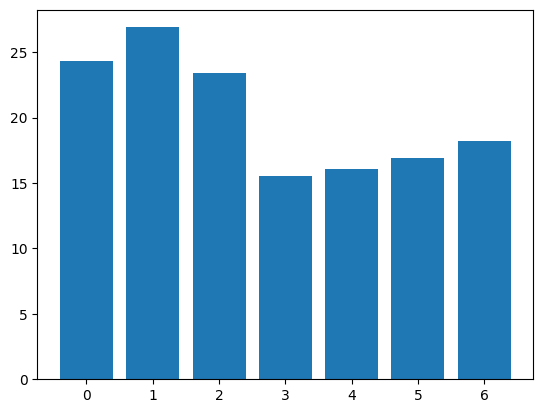

In [290]:
plt.bar(np.arange(df[0].shape[0]),df[0])

In [291]:
df_total = pd.DataFrame({'sa':df[:,0],'su':df[:,1],'mo':df[:,2],'tr':df[:,3],'we':df[:,4],'tur':df[:,5],'y':df[:,6]})
df_total


,sa,su,mo,tr,we,tur,y
0,24.3,26.9,23.4,15.5,16.1,16.9,18.2
1,26.9,23.4,15.5,16.1,16.9,18.2,17.0
2,23.4,15.5,16.1,16.9,18.2,17.0,19.5
3,15.5,16.1,16.9,18.2,17.0,19.5,22.8
4,16.1,16.9,18.2,17.0,19.5,22.8,25.2
...,...,...,...,...,...,...,...
355,20.6,15.0,18.0,20.7,25.5,26.1,30.7
356,15.0,18.0,20.7,25.5,26.1,30.7,28.4
357,18.0,20.7,25.5,26.1,30.7,28.4,19.9
358,20.7,25.5,26.1,30.7,28.4,19.9,26.9


In [292]:
x = df_total.drop("y",axis=1)
y = df_total['y']
x,y

(       sa    su    mo    tr    we   tur
 0    24.3  26.9  23.4  15.5  16.1  16.9
 1    26.9  23.4  15.5  16.1  16.9  18.2
 2    23.4  15.5  16.1  16.9  18.2  17.0
 3    15.5  16.1  16.9  18.2  17.0  19.5
 4    16.1  16.9  18.2  17.0  19.5  22.8
 ..    ...   ...   ...   ...   ...   ...
 355  20.6  15.0  18.0  20.7  25.5  26.1
 356  15.0  18.0  20.7  25.5  26.1  30.7
 357  18.0  20.7  25.5  26.1  30.7  28.4
 358  20.7  25.5  26.1  30.7  28.4  19.9
 359  25.5  26.1  30.7  28.4  19.9  26.9
 
 [360 rows x 6 columns],
 0      18.2
 1      17.0
 2      19.5
 3      22.8
 4      25.2
        ... 
 355    30.7
 356    28.4
 357    19.9
 358    26.9
 359    30.2
 Name: y, Length: 360, dtype: float64)

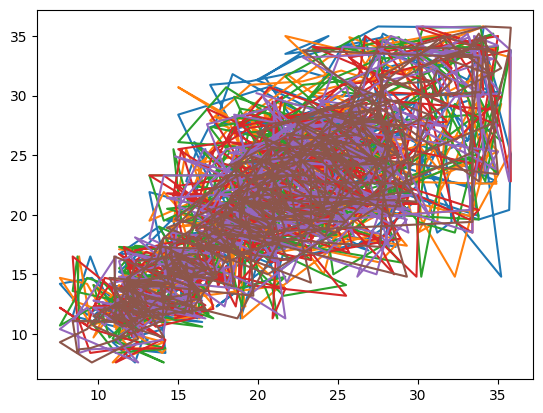

In [293]:
plt.plot(x,y)

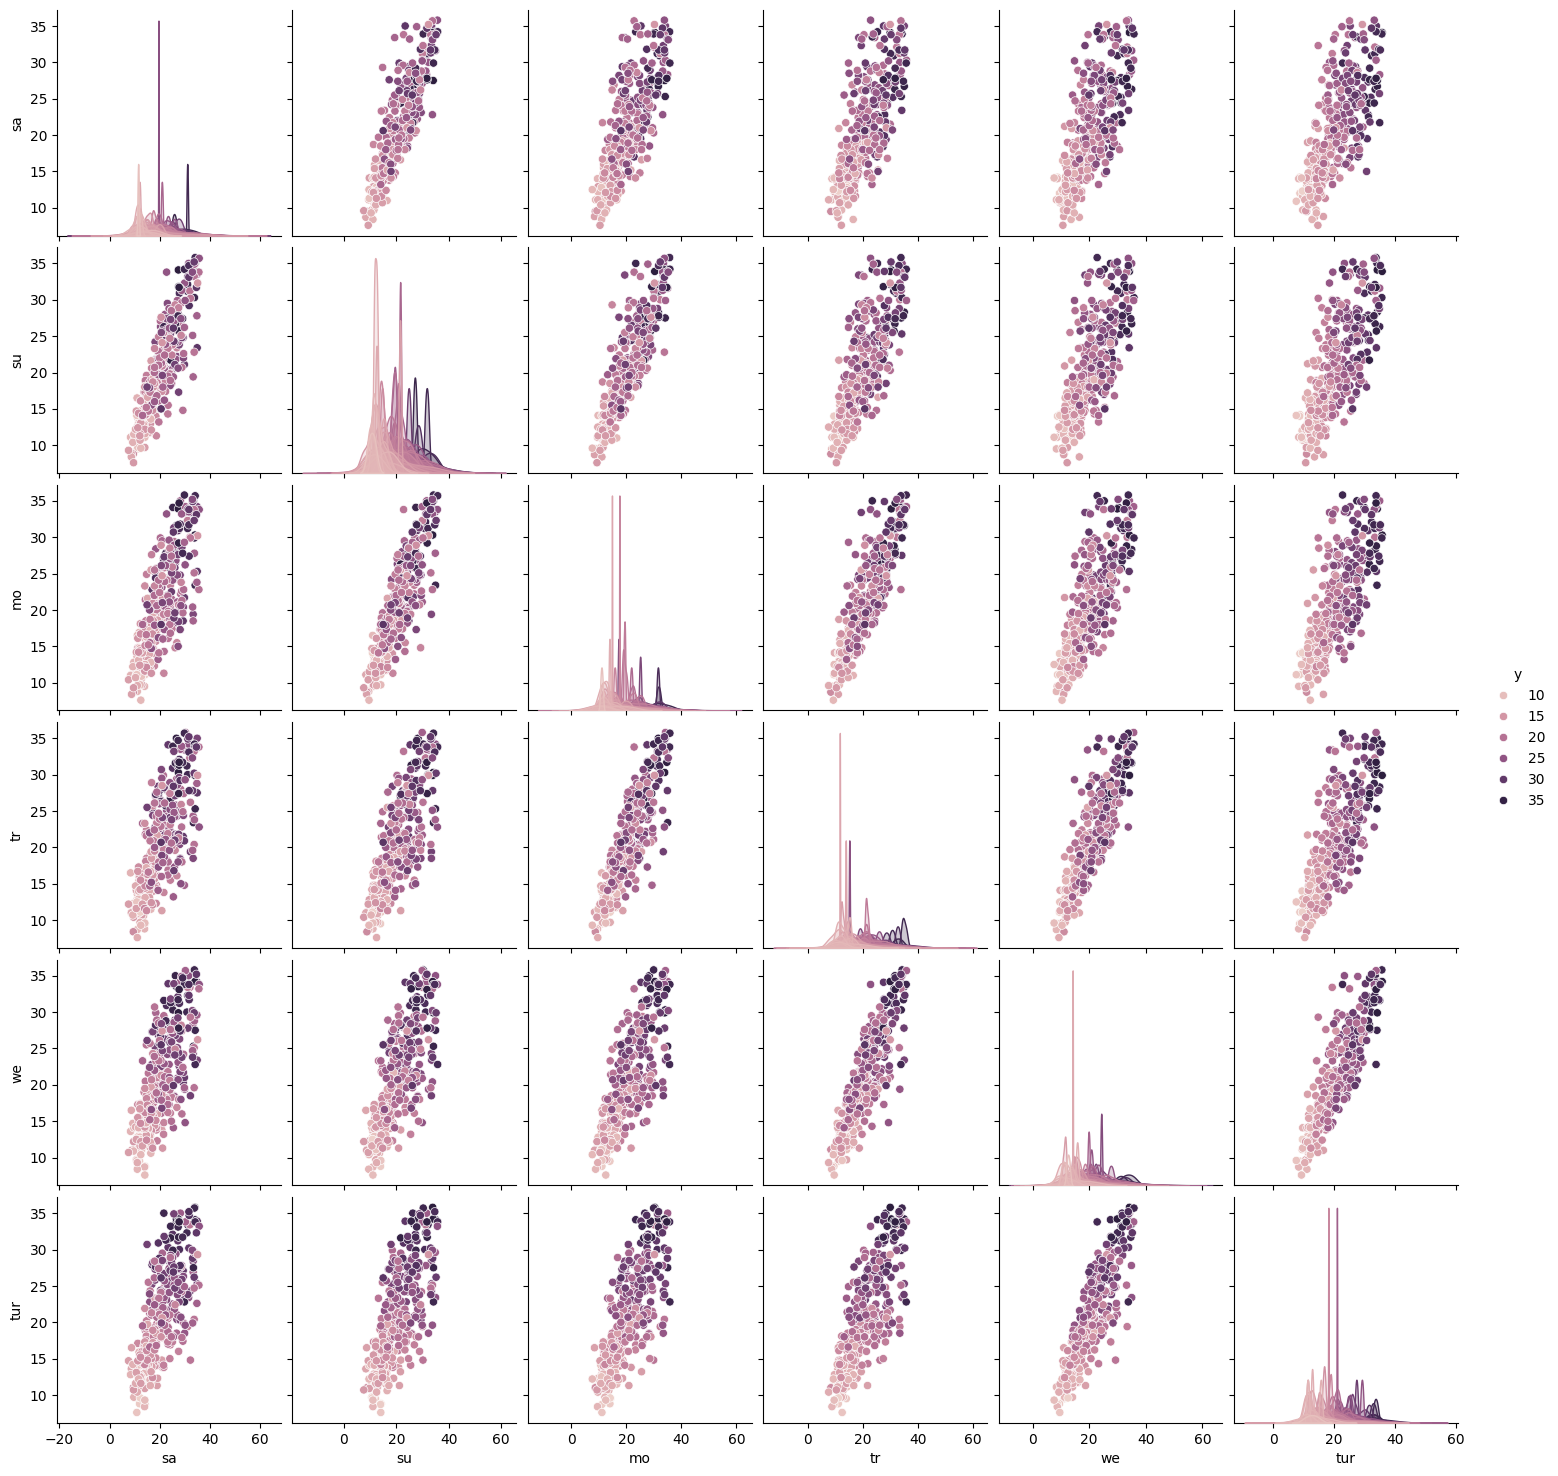

In [294]:
sns.pairplot(df_total,hue="y") 

In [295]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [296]:
model.score(x,y)

0.7912634266069318

In [297]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.shape

(288, 6)

In [298]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [299]:
model.score(X_train,y_train)

0.7980429388876451

In [300]:
model.score(X_test,y_test)

0.759611251135296

In [301]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [302]:
mean_absolute_error(y_train,p_train)

2.2441002571801345

In [303]:
mean_absolute_error(y_test,p_test)

2.4828585252718582